In [22]:
import pandas
import numpy as np
import sys
import matplotlib.pyplot as plt

# Go into above directory and download function
sys.path.append('../../') 
import sheet_to_df

# Extract sheet id - last number of google sheet
sheet_id = 1254810295

In [23]:
# Create Df
df = sheet_to_df.sheet_to_df(sheet_id, 'Data-Structures')

In [24]:
# Cleaning
# Remove Nan
df = df.replace(np.nan, '', regex=True)   

# Remove 0.001 and 0.0 
df = df[(df["Looked at?"] != 0.001) &
        (df["Year"] != "?") &
        (df["Looked at?"] != 0.0) ]

# Filter out the columns we're interested in
columns_of_interest = ['Domain', 'Year'] + [col for col in df.columns if '(Time)' in col]
df = df[columns_of_interest]

# Remove rows with missing 'Year' values
df= df.dropna(subset=['Year'])

# Convert 'Year' to integer
# df['Year'] = df['Year'].astype(int)

# Get rid of parallel, quantum, and approximate algorithms (still need to write code to do this)
# df.to_csv('Analysis/datastructures.csv')
# return dataframe

In [25]:
# find unique values in Domain
domains = df['Domain'].unique()
domains

array(['Ordered Associative Array (Comparison)',
       'Ordered Associative Array (Non-Comparison), Large Universe',
       'Ordered Associative Array (Non-Comparison), Smaller Universe',
       'Unordered Associative Array', 'Associative Array', 'Tree',
       'Rank/Select Data Structure (Static)', 'Search Tree',
       'Optimal Binary Search Tree (No Insert/Delete)',
       'Optimal Binary Search Tree (with Insert/Delete)', 'Binary Tree',
       'Binary Tree/Cryptography', 'Priority Queue',
       'Monotone Priority Queue', 'Double-ended Priority Queue',
       'Double-ended Priority Queue with Complementary Range Queries',
       'Nearest Neighbor Search', 'Nearest Neighbor Search?',
       'Range Search', 'Range Search, External Memory',
       'Orthogonal Range Search', 'Orthogonal Range Search, Static',
       'Spatial Data Structure', 'String Search, Online', 'String Search',
       'Approximate Membership Query Filter (without delete)',
       'Approximate Membership Query Fil

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to a bright one
sns.set(style="whitegrid", palette="bright")

# Get the list of operations and domains
operations = [col for col in df.columns if '(Time)' in col]
domains = df['Domain'].unique()

# Create a figure with as many subplots as there are domains
fig, axes = plt.subplots(nrows=len(domains), figsize=(20, len(domains)*5))

# Loop over each domain
for ax, domain in zip(axes, domains):
    # Filter the dataframe for the current domain
    df_domain = df[df['Domain'] == domain]

    # Sort the dataframe by 'Year'
    df_domain = df_domain.sort_values('Year')
    
    # Loop over each operation
    for operation in operations:
        # Check if the operation has any non-null values in the current domain
        if df_domain[operation].notna().any():
            # Create a line plot for the current operation
            sns.lineplot(x='Year', y=operation, data=df_domain, ax=ax, marker='o', sort=False)
    
    # Set the title of the subplot to the domain name
    ax.set_title(domain)
    ax.set_ylabel('Complexity')
    ax.set_xlabel('Year')
    
    # Invert the y-axis to have the fastest complexities at the bottom
    ax.invert_yaxis()
    

# Improve layout
plt.tight_layout()

plt.show()

In [45]:
# Create Df
df = sheet_to_df.sheet_to_df(sheet_id, 'Data-Structures')

In [ ]:
df

In [46]:
# Preprocessing

# Filter the rows where 'Time Complexity Improvement?' is 1
df = df[df['Looked at?'] == 1].copy()

# Order the DataFrame by year
df = df.sort_values(by="Year")

# Convert 'Year' column to string and replace 'nan' and '?' with 'Unknown'
df['Year'] = df['Year'].astype(str).replace(['nan', '?'], 'Unknown')

/var/folders/wg/bqtpsjds1p16_p2clkzkw5d80000gn/T/ipykernel_90605/274208486.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 7))


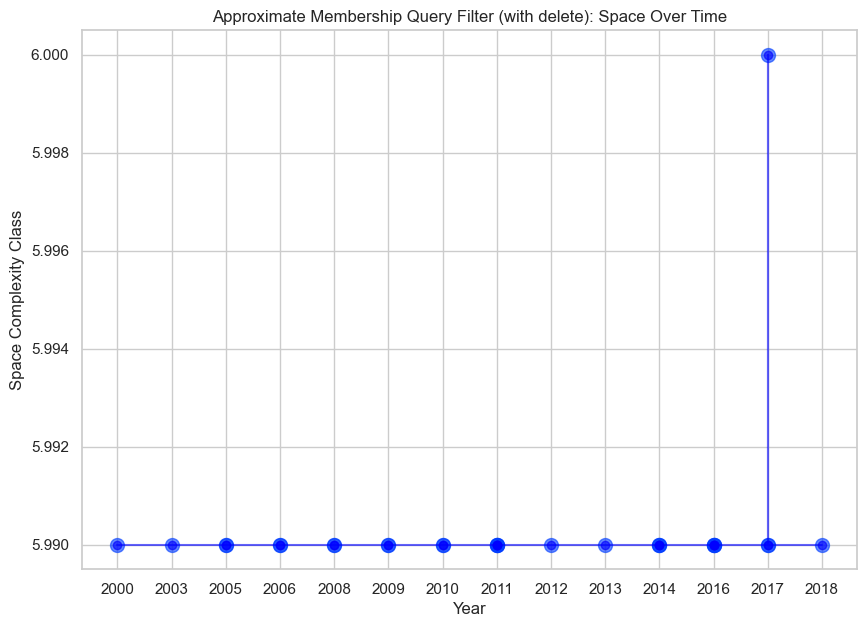

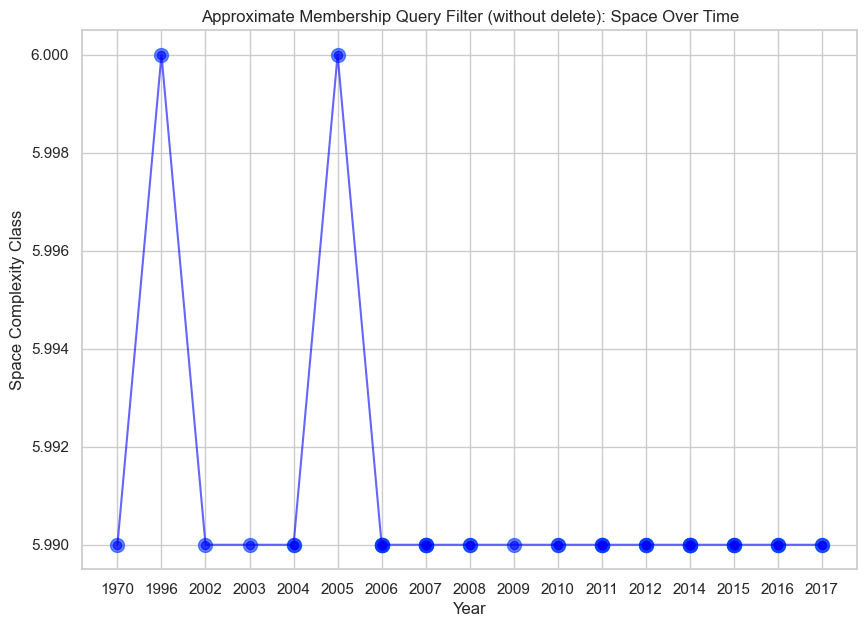

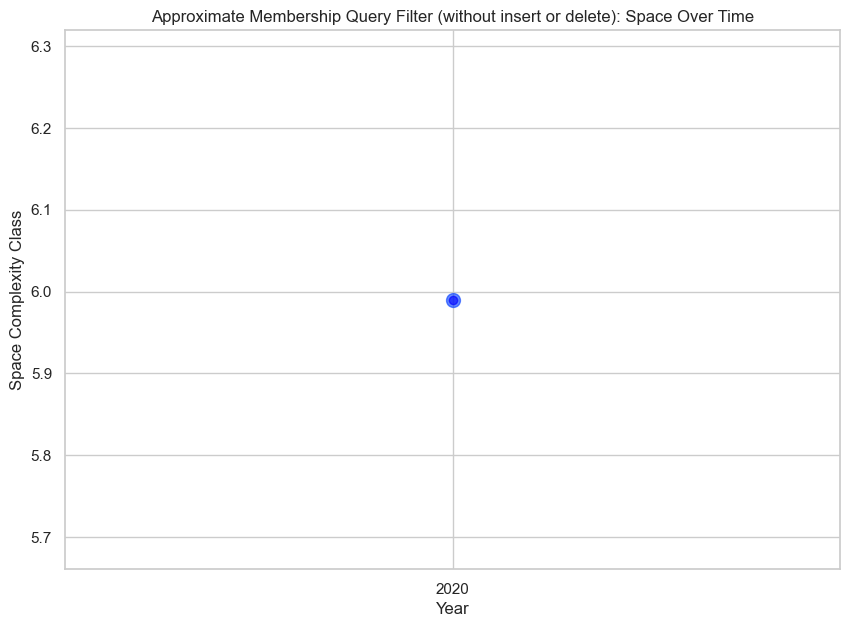

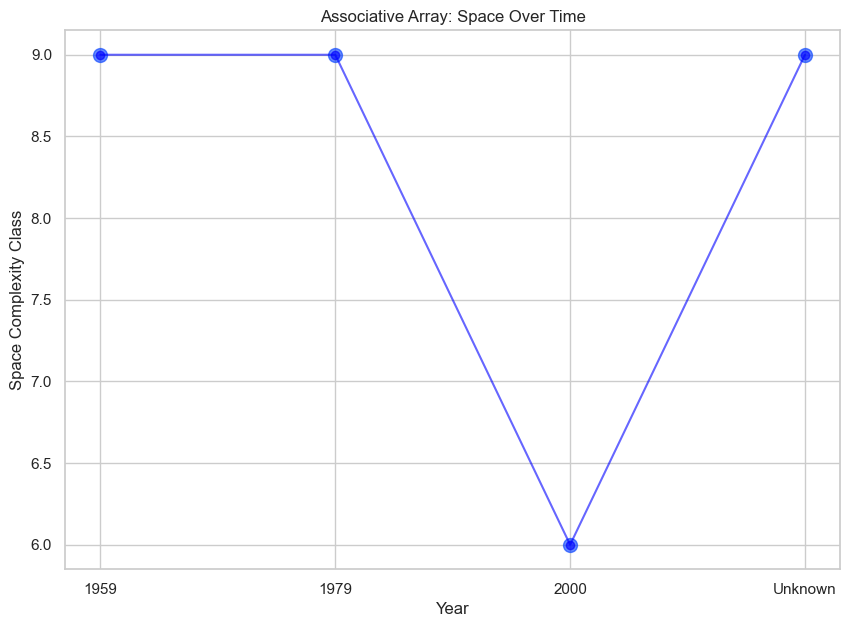

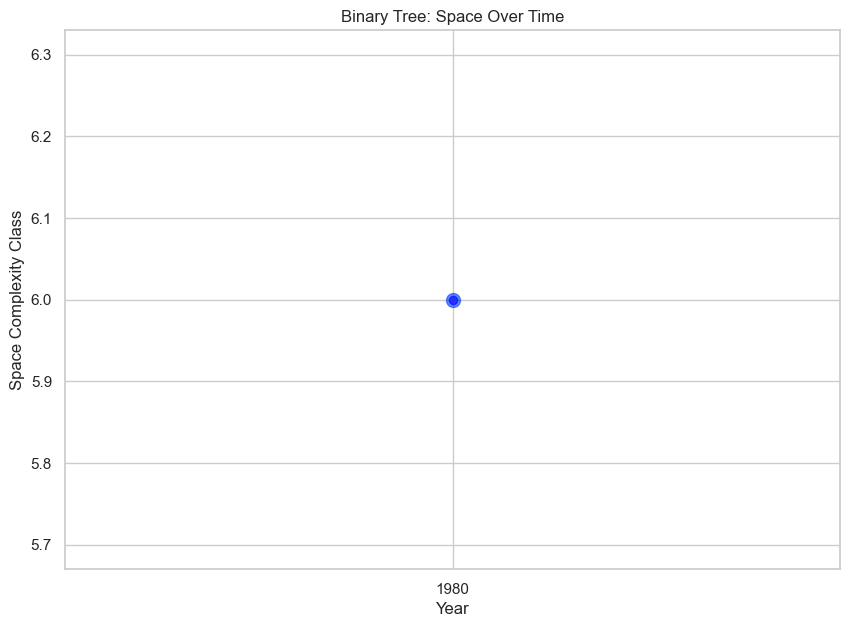

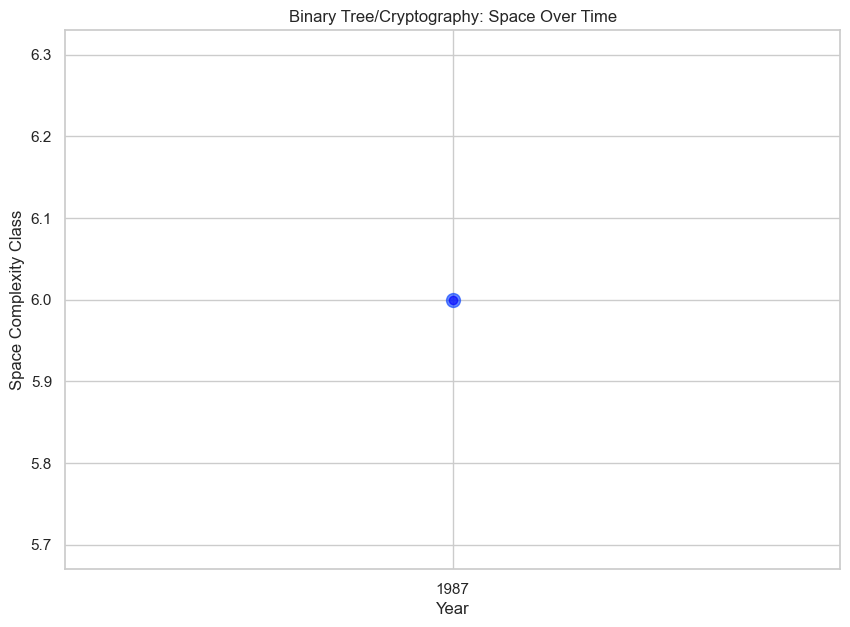

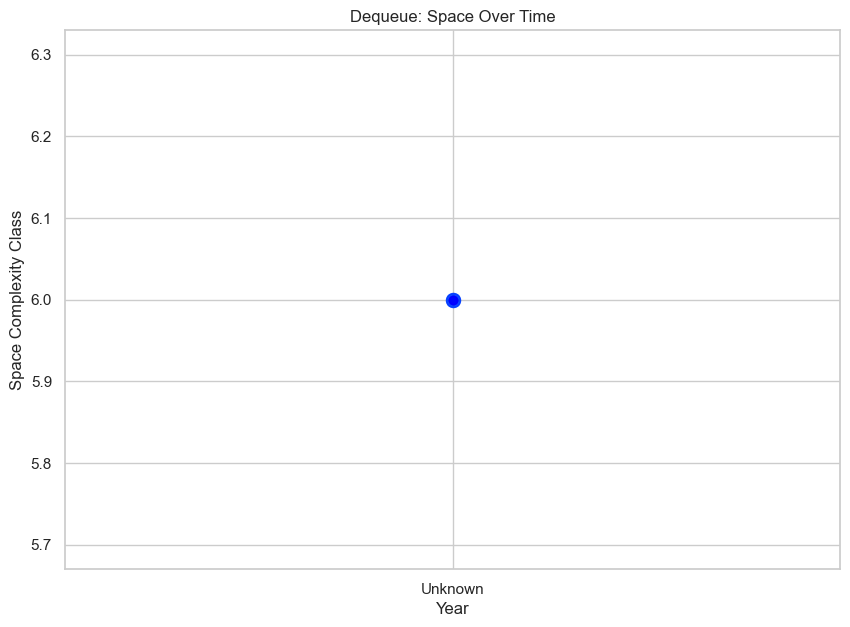

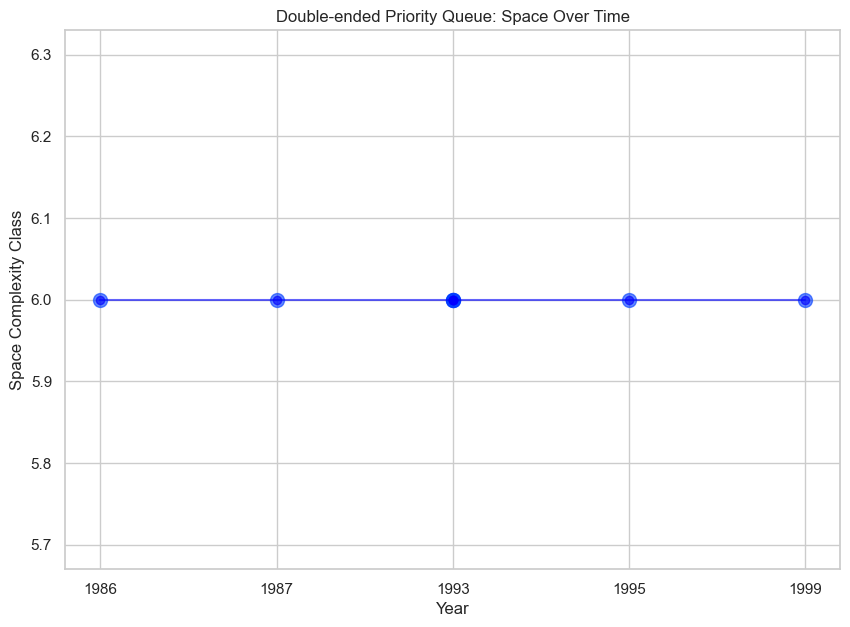

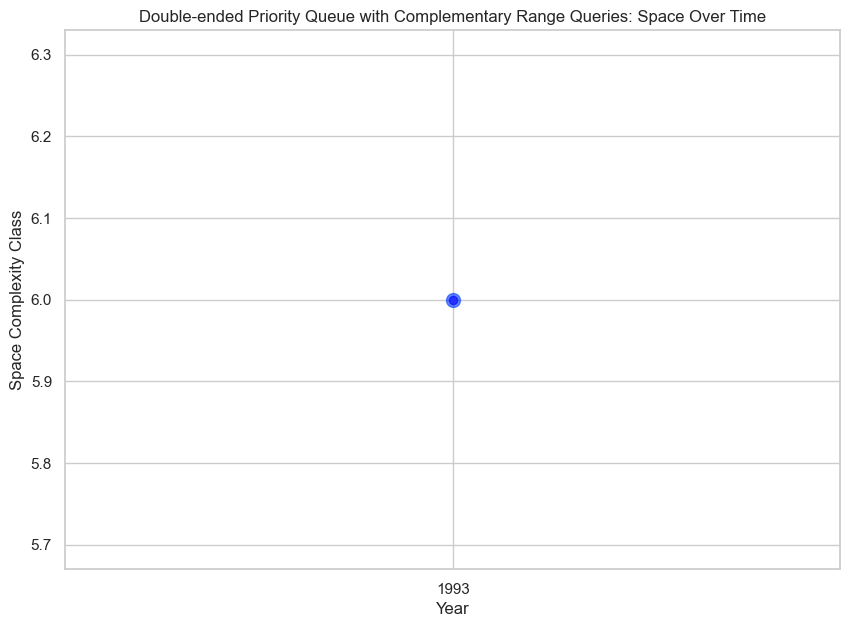

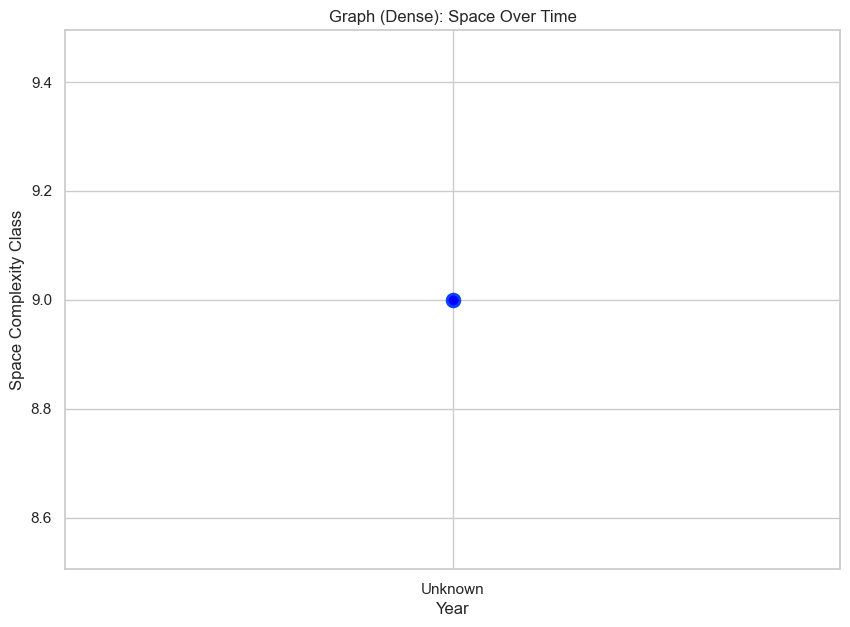

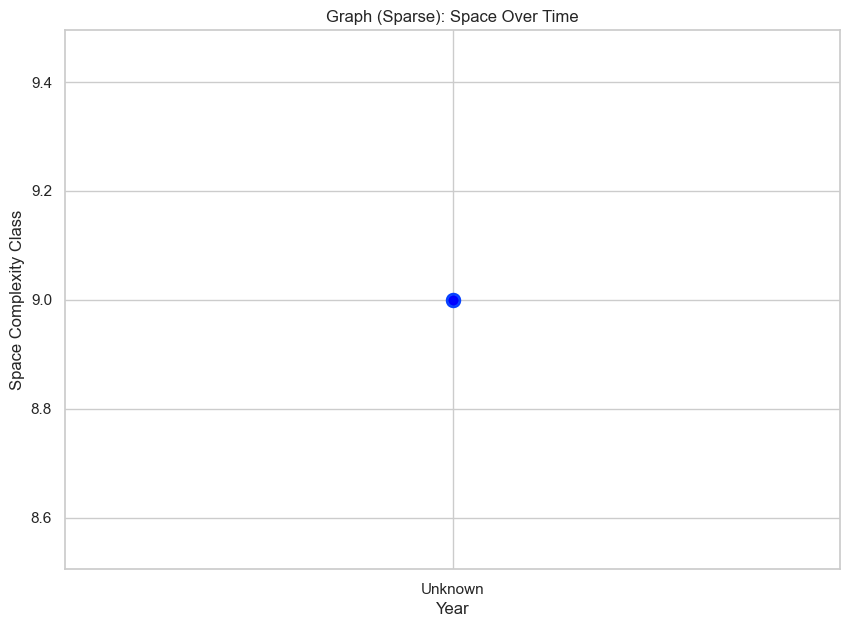

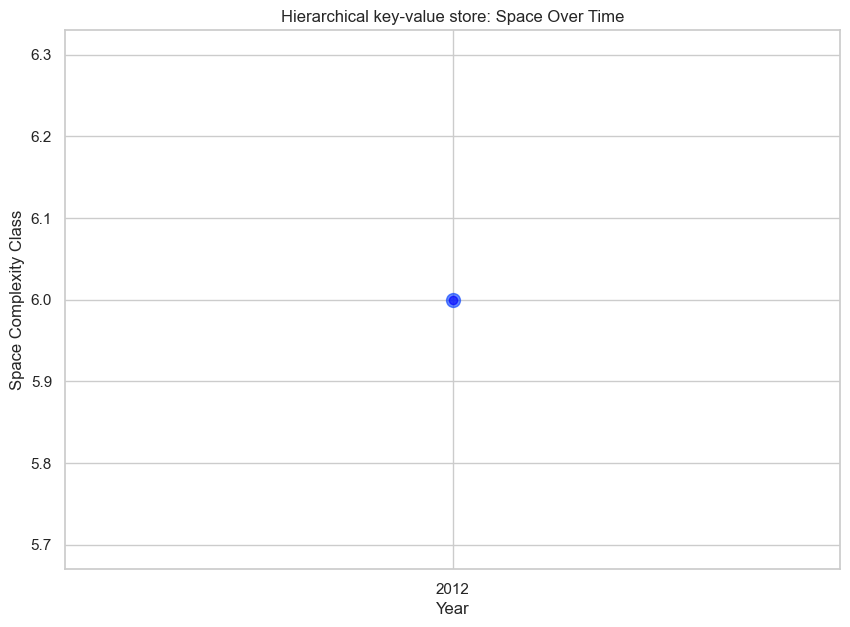

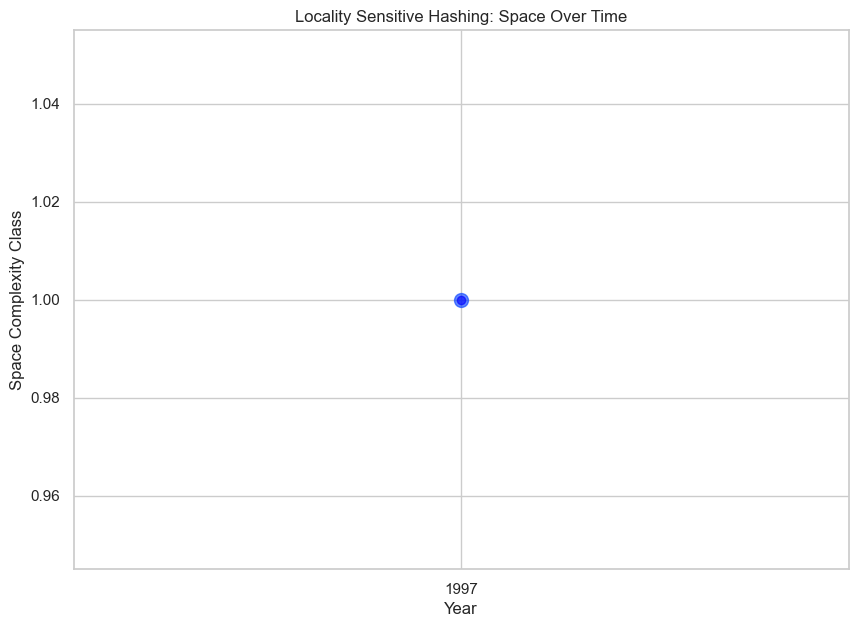

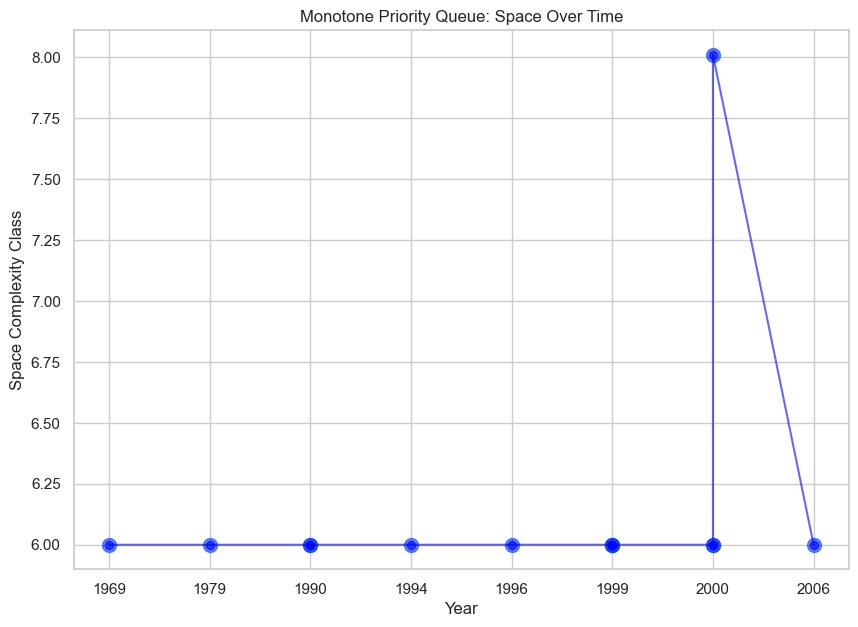

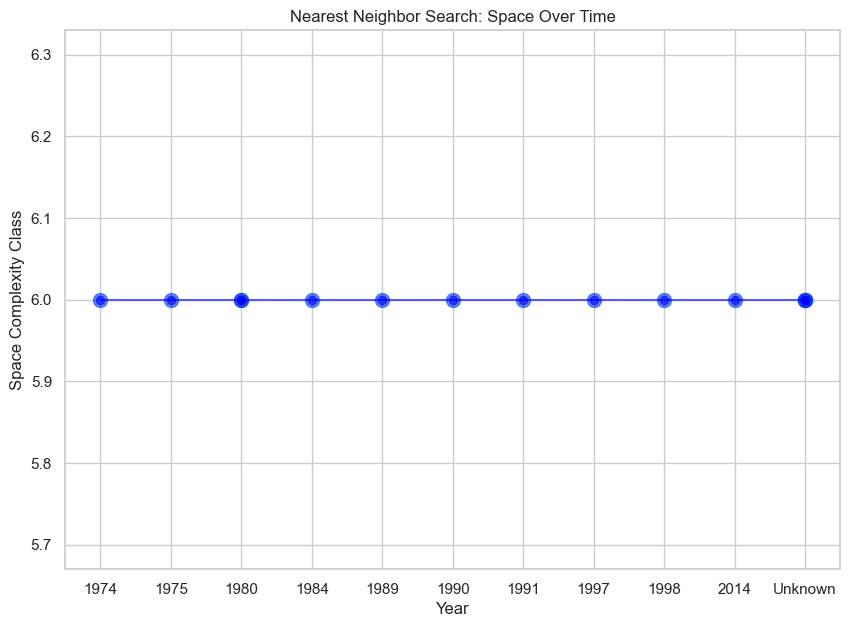

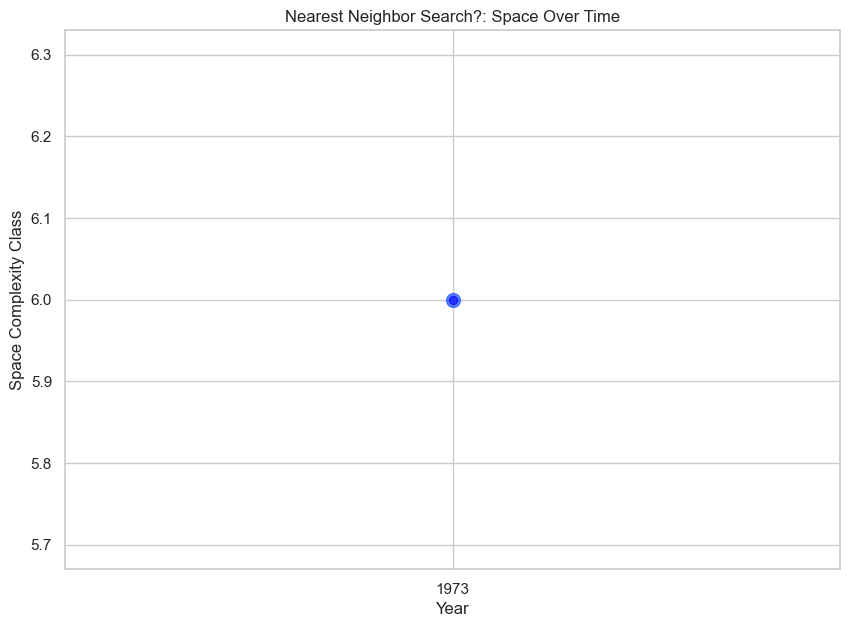

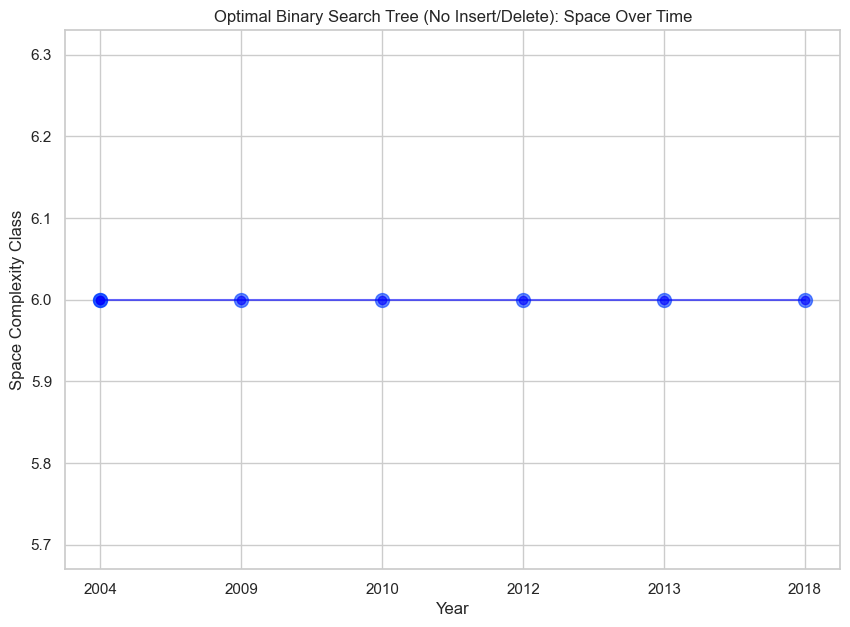

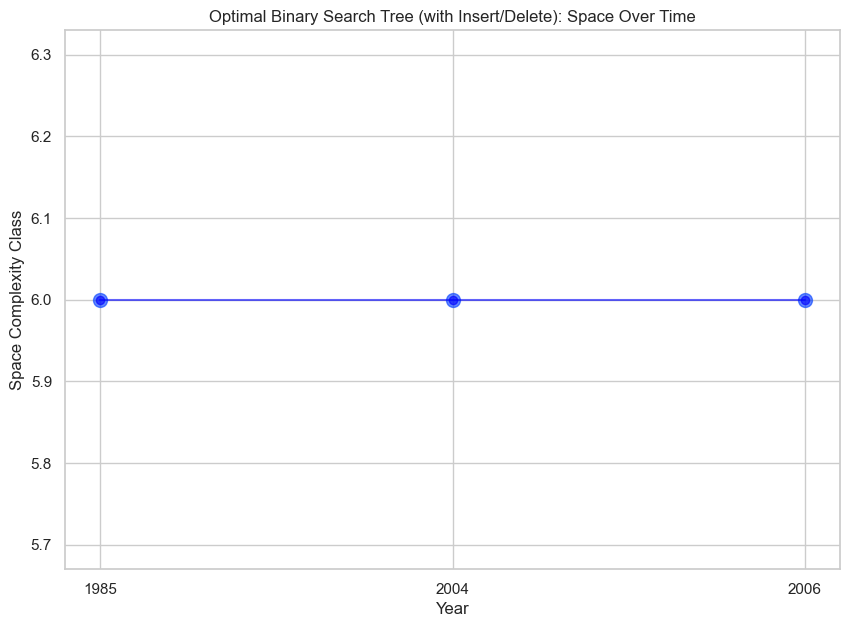

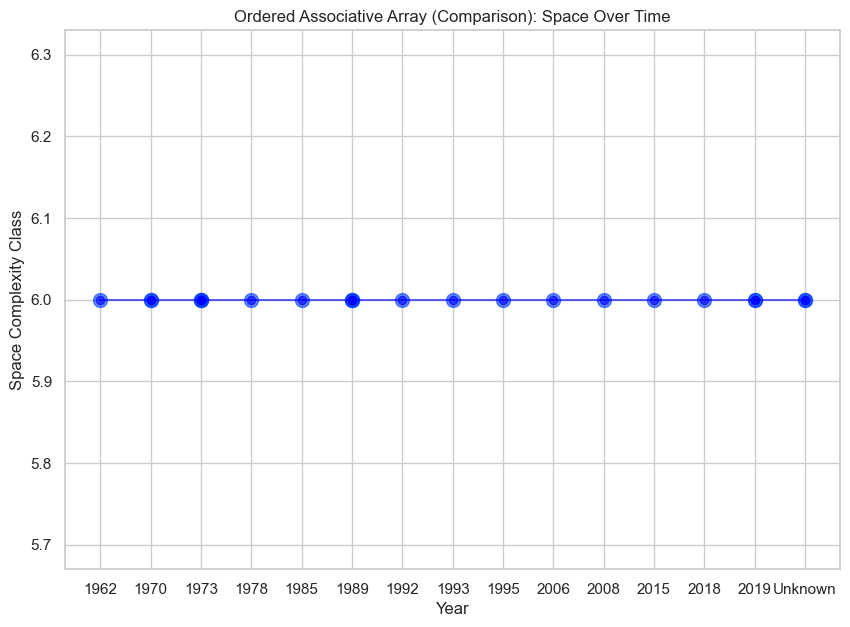

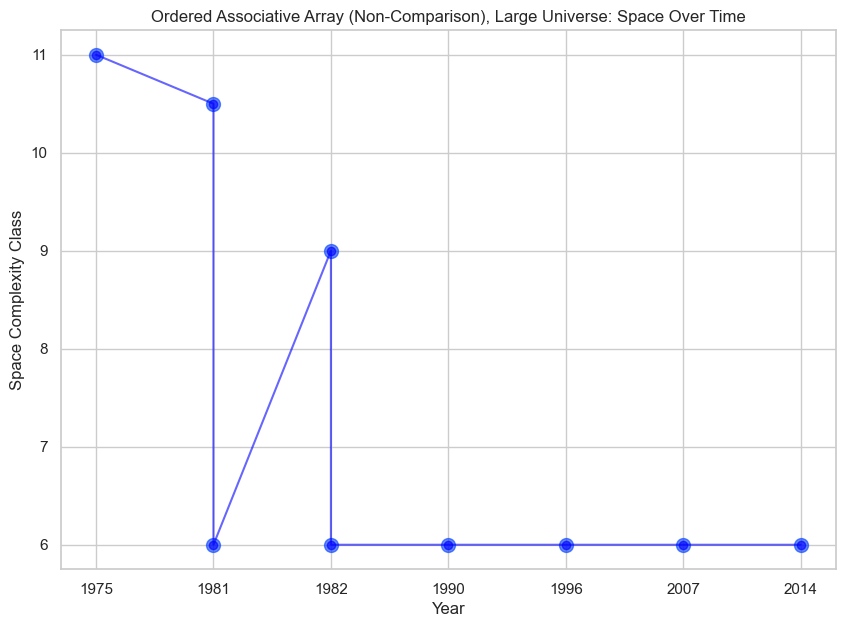

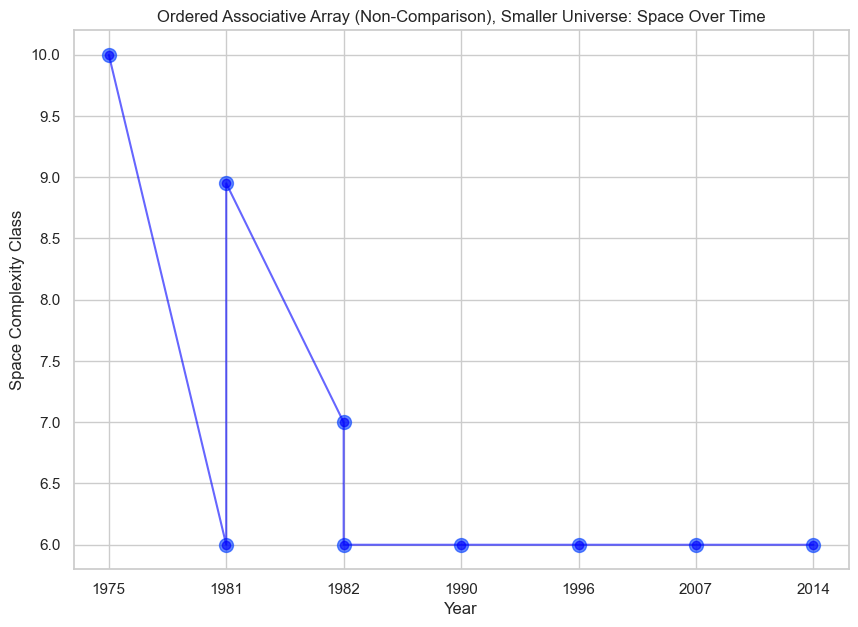

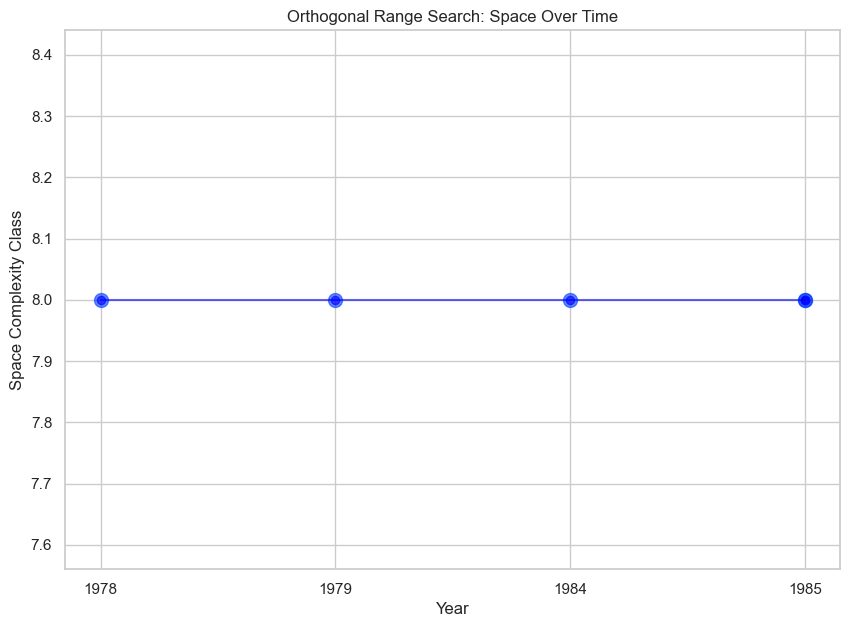

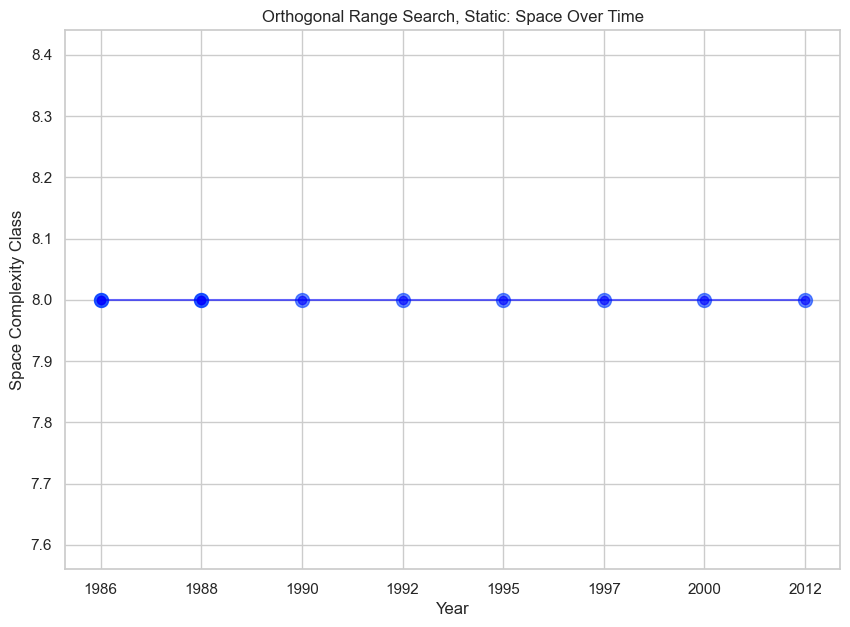

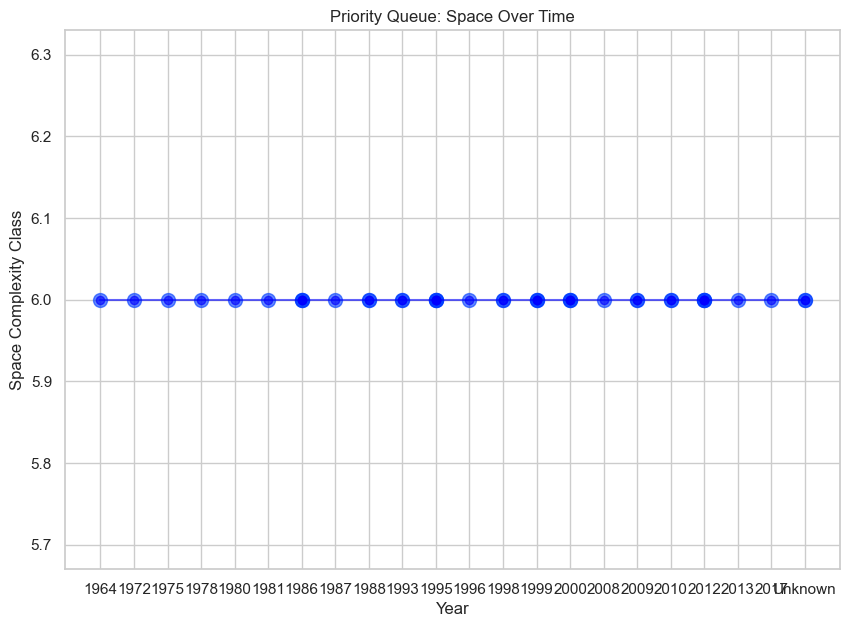

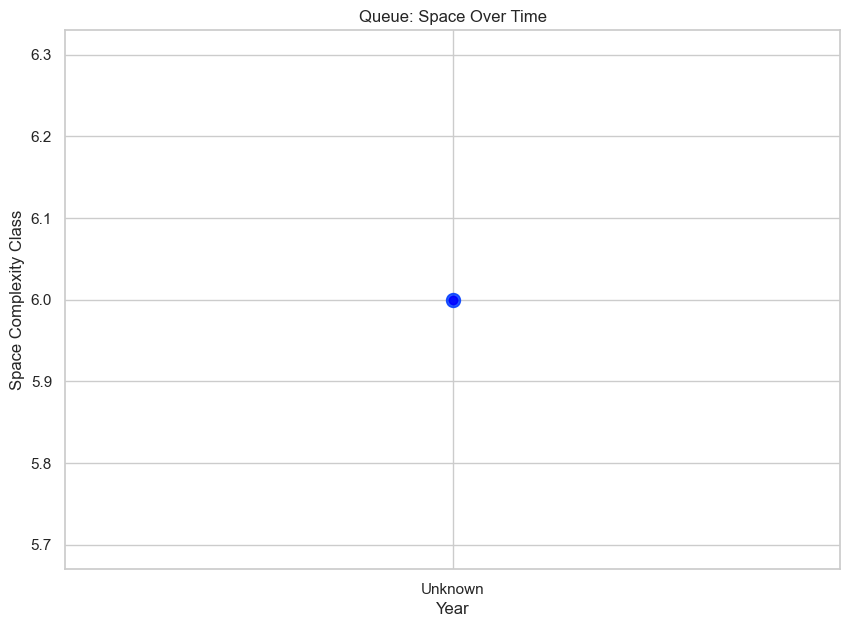

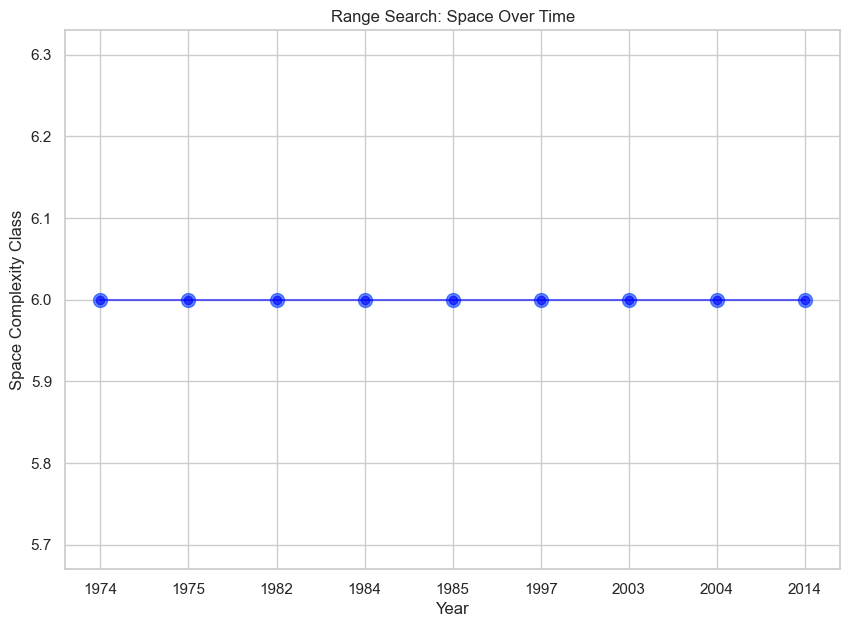

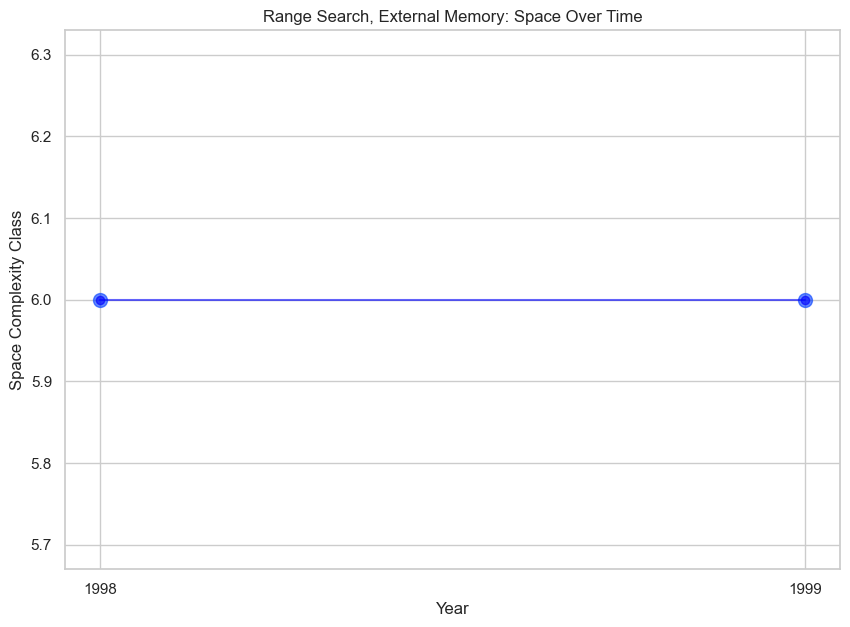

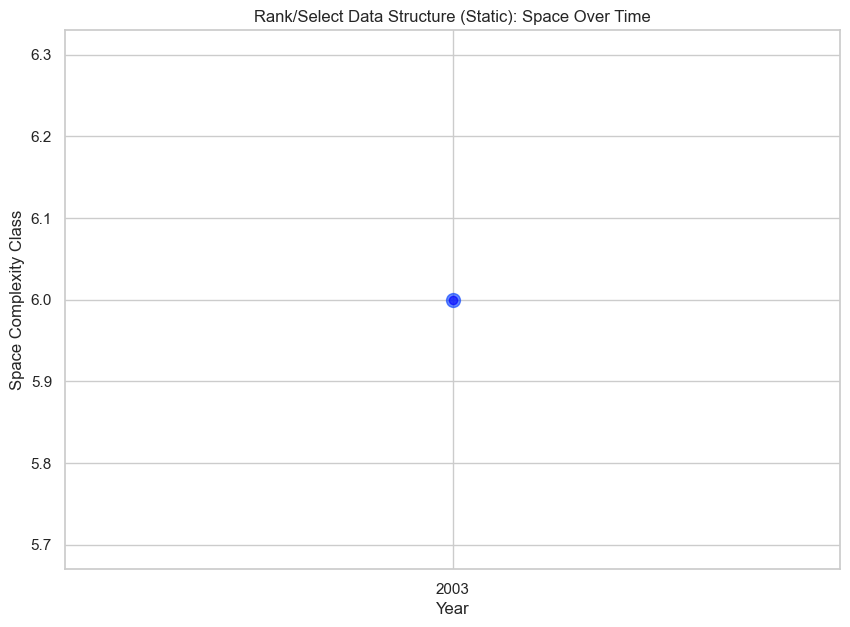

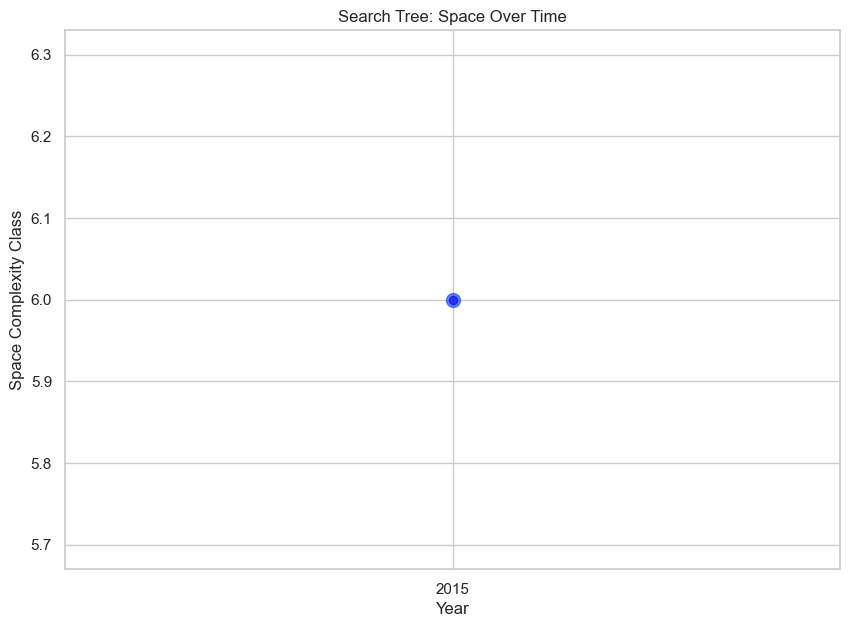

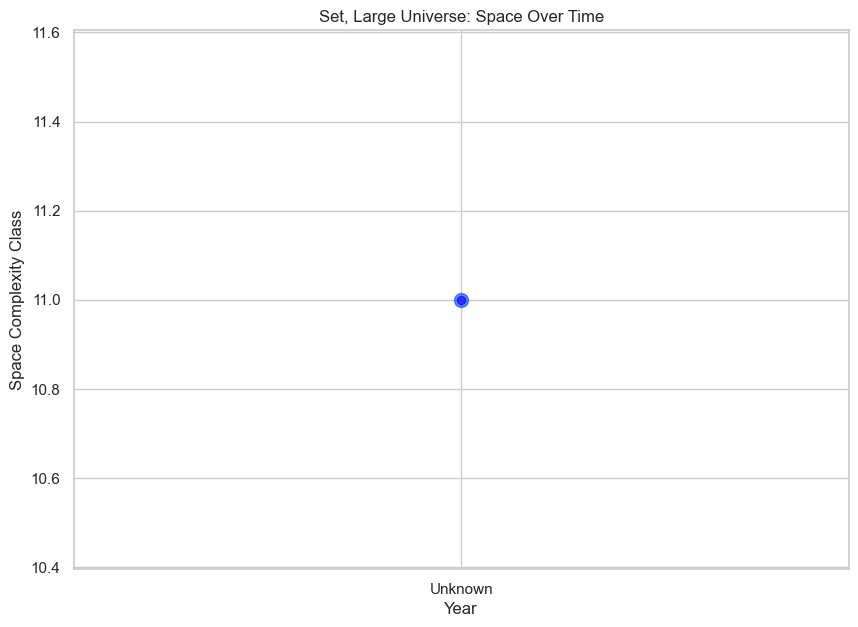

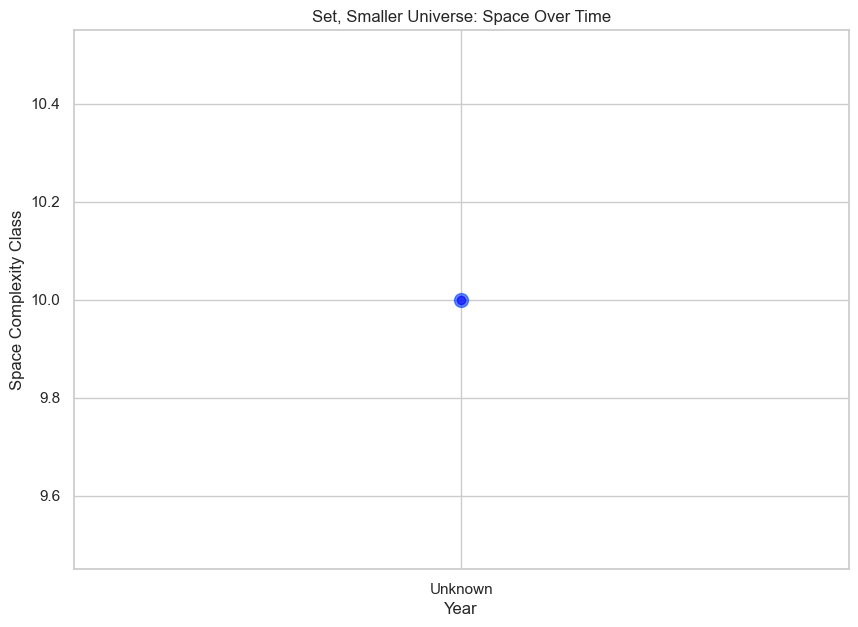

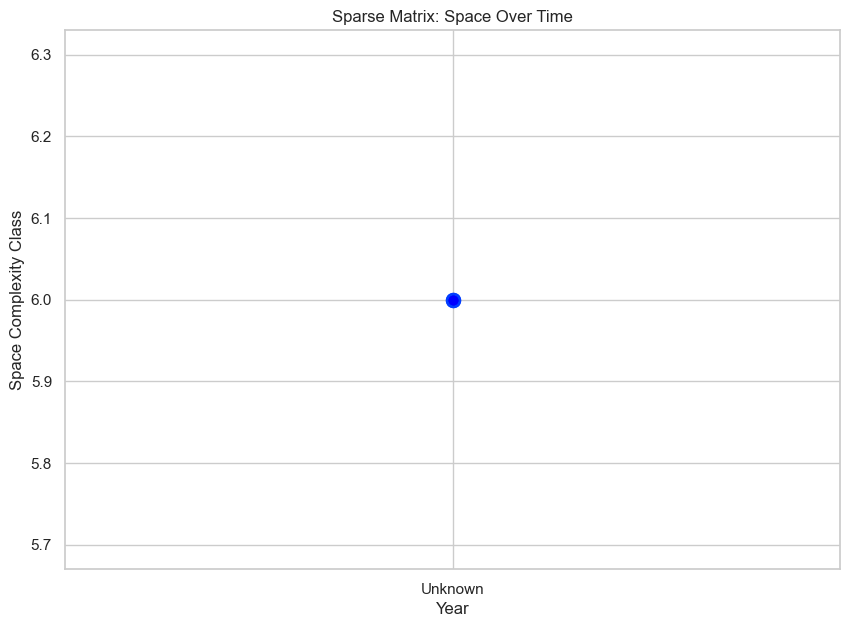

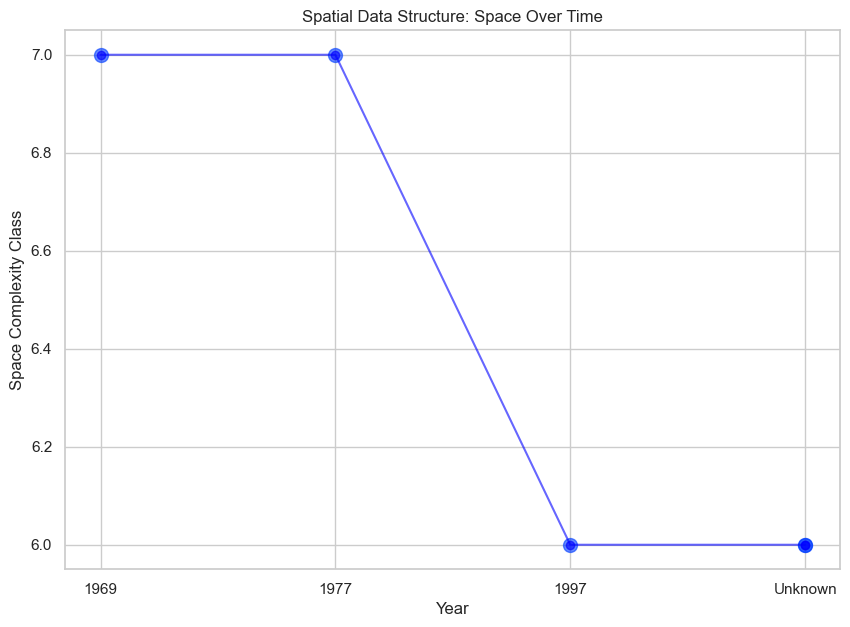

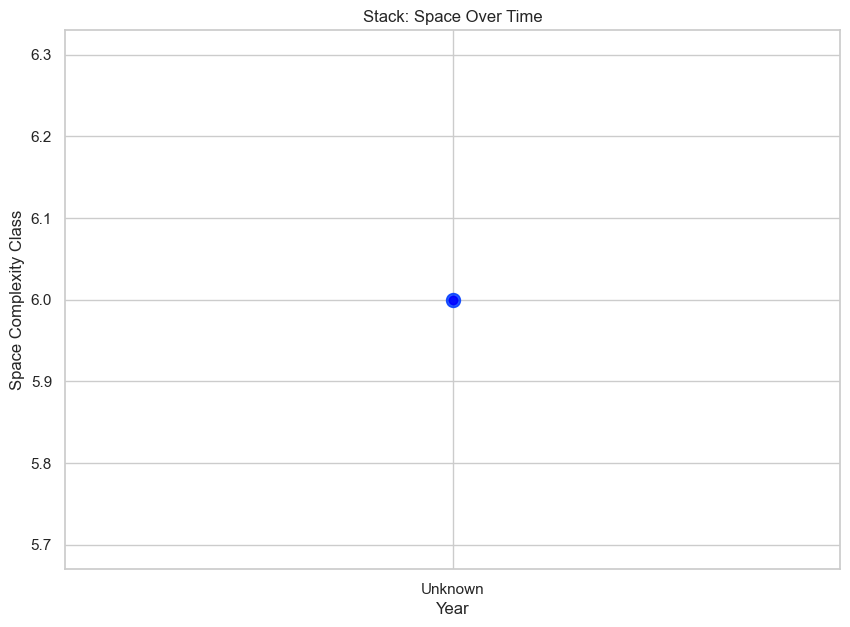

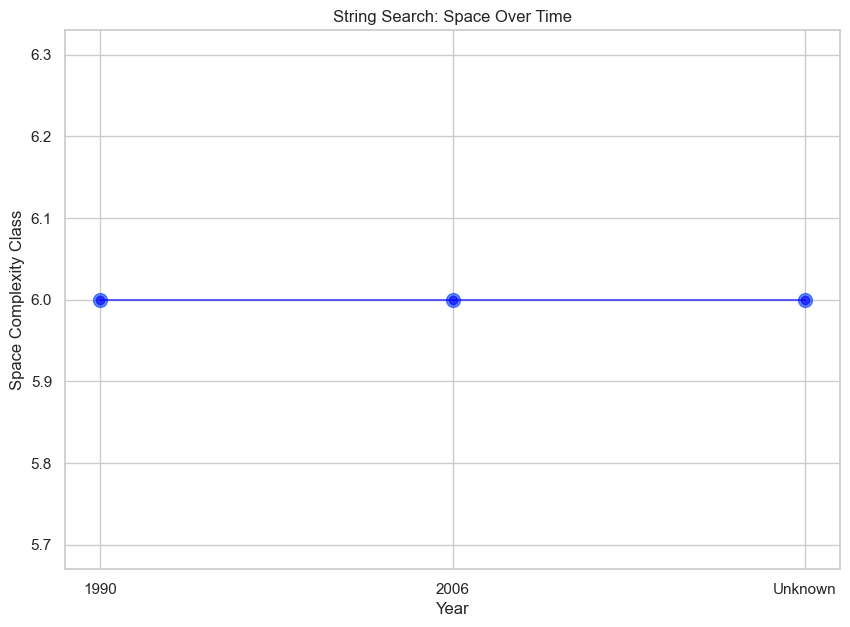

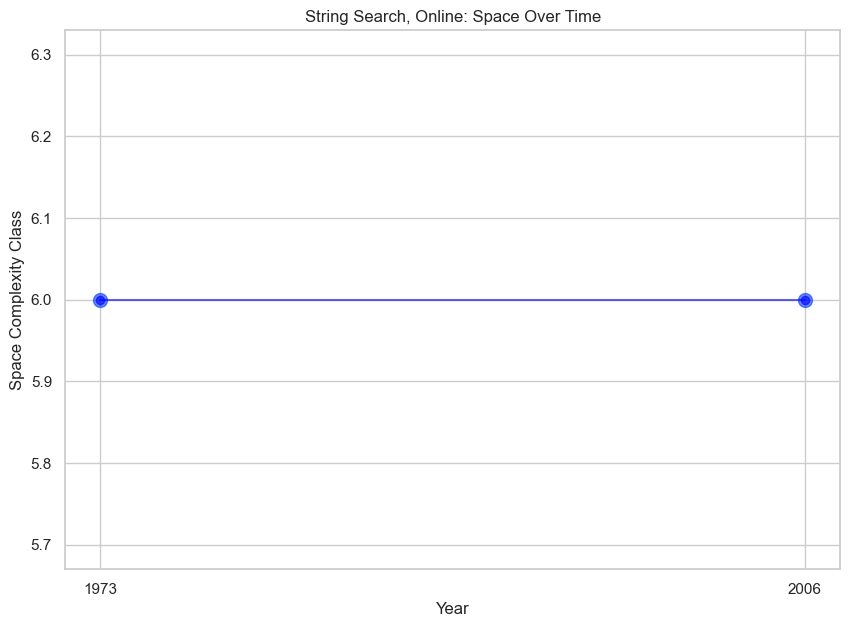

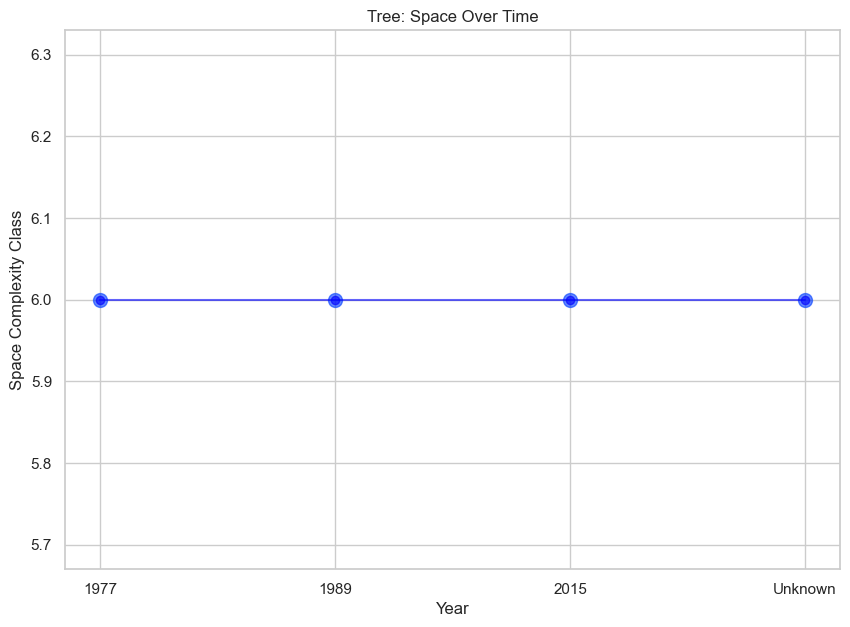

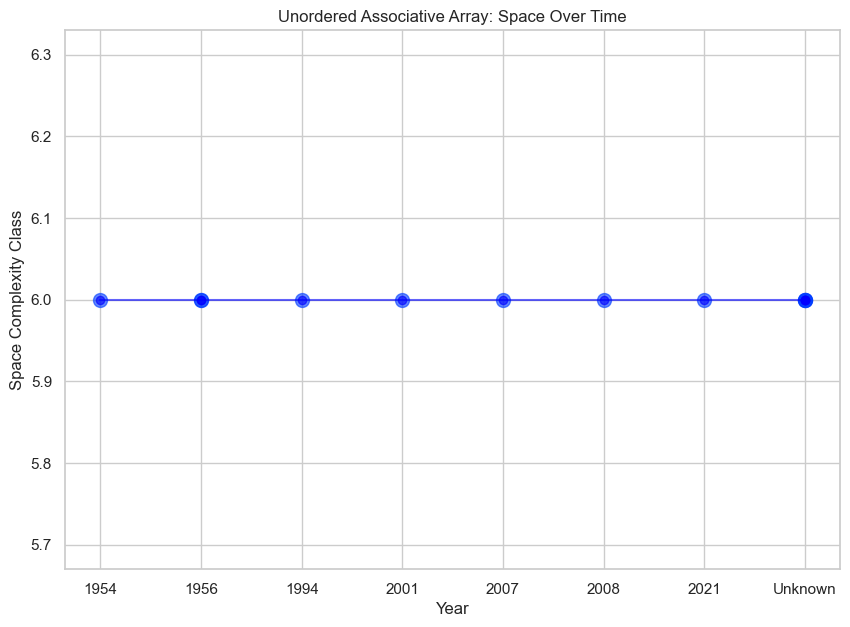

In [48]:
# Create separate DataFrames for each domain and store them in a dictionary
domain_dfs = {domain: data for domain, data in df.groupby('Domain')}

plots = []

# Identify columns with '(Time)' in the name and the 'Space' column
operation_columns = [col for col in df.columns if '(Time)' in col or col == 'Space']

for domain, domain_df in domain_dfs.items():
    for operation in operation_columns:
        complexity_col = operation + ' Class'
        if complexity_col in domain_df.columns:
            fig, ax = plt.subplots(figsize=(10, 7))
            ax.scatter(domain_df['Year'], domain_df[complexity_col], s=100, label=operation, alpha=0.6)
            ax.plot(domain_df['Year'], domain_df[complexity_col], '-o', color='blue', alpha=0.6)
            
            ax.set_title(f"{domain}: {operation} Over Time")
            ax.set_xlabel('Year')
            ax.set_ylabel(f'{operation} Complexity Class')
            
            plots.append((fig, ax))

# Display the plots
for fig, ax in plots:
    plt.show()